In [1]:
# 1) 查看前2行和后2行数据
import pandas as pd
pd.set_option('display.max_columns', None)  # 设置显示最大列
df = pd.read_csv(r'./HR_comma_sep.csv')
pd.set_option('display.max_rows', 4)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
...,...,...,...,...,...,...,...,...,...,...
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [2]:
# 数据维度14999行×10列, 除过岗位和薪资水平是字符型外, 其余均是数字

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [2]:
# 2)查看数据类型等信息
# 前两个特征为64位浮点型, 后两个为字符型, 其余为64位整型, 且均无缺失值.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
# 3). 描述性统计
# 1) 员工对公司满意度平均水平如何？员工的最新考核情况又是如何？员工所参加项目数是怎样？员工平均每月工作时长以及平均工作年限分别是多少？
# 员工对公司的满意度: 范围 0.09~1, 中位数0.640, 均值0.613, 总体来说员工对公司较满意
#  最新考核评估: 范围 0.36~1, 中位数0.720, 均值0.716, 员工考核平均水平中等偏上.
# 项目数: 范围 2~7个, 中位数4, 均值3.8, 平均参加项目数为4个
# 平均每月工作时长: 范围96~310小时, 中位数200, 均值201
# 工作年限: 范围2~10年, 中位数3, 均值3.5
df.describe()
df.describe(include=['O']).T

,count,unique,top,freq
sales,14999,10,sales,4140
salary,14999,3,low,7316


In [4]:
# 2) 当前离职率是多少？工作事故发生率？过去5年升职率？薪资水平又如何？共有多少种岗位？
# 当前离职率为23.81%

#工作事故发生率14.46%.
#薪资水平共有3个等级, 最多的是低等, 多达7316人.

# 员工岗位有10种, 其中最多的是销售, 多达4140人
# 过去5年升职率2.13%.
pd.set_option('display.max_rows', None)
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#1) 员工对公司满意度平均水平如何？员工的最新考核情况又是如何？员工所参加项目数是怎样？员工平均每月工作时长以及平均工作年限分别是多少？
# 员工对公司的满意度: 范围 0.09~1, 中位数0.640, 均值0.613, 总体来说员工对公司较满意
#最新考核评估: 范围 0.36~1, 中位数0.720, 均值0.716, 员工考核平均水平中等偏上.
#项目数: 范围 2~7个, 中位数4, 均值3.8, 平均参加项目数为4个
#平均每月工作时长: 范围96~310小时, 中位数200, 均值201
# 工作年限: 范围2~10年, 中位数3, 均值3.5
# 2) 当前离职率是多少？工作事故发生率？过去5年升职率？薪资水平又如何？共有多少种岗位？
#当前离职率为23.81%
#工作事故发生率14.46%.
#过去5年升职率2.13%.

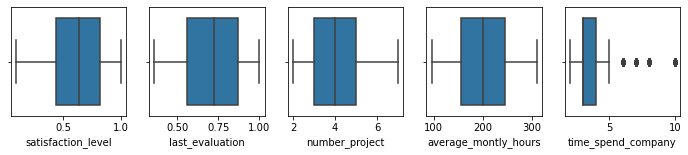

In [5]:
# 4. 数据预处理
# 1. 异常值
#通过箱线图查看异常值.
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,5, figsize=(12, 2))
sns.boxplot(x=df.columns[0], data=df, ax=ax[0])
sns.boxplot(x=df.columns[1], data=df, ax=ax[1])
sns.boxplot(x=df.columns[2], data=df, ax=ax[2])
sns.boxplot(x=df.columns[3], data=df, ax=ax[3])
sns.boxplot(x=df.columns[4], data=df, ax=ax[4])
# 除了工作年限外, 其他均无异常值. 该异常值也反映了该公司员工中以年轻人为主 

In [6]:
# 5. 可视化分析
# 在这里通过可视化的形式对第三个问题“是否离职和其他9个特征的关系如何?”进行回答.0
# 1. 人力资源总体情况

In [8]:
from pyecharts import Pie
attr = ["离职", "在职"]
v1 =[df.left.value_counts()[1], df.left.value_counts()[0]]
pie = Pie("该公司人力资源总体情况", title_pos='center')
pie.add(
    "",
    attr,                       
    v1,                          
    radius=[35, 65],
    label_text_color=None,
    is_label_show=True,
    legend_orient="vertical",
    legend_pos="left",
)
pie.render()

In [9]:
# 2. 对公司满意度与是否离职的关系
from pyecharts import Boxplot
#字段重命名
df.columns=['satisfaction', 'evaluation', 'project', 'hours', 'years_work','work_accident', 'left', 'promotion', 'department', 'salary']
#绘制箱线图
boxplot = Boxplot("对公司满意度与是否离职关系图", title_pos='center')
x_axis = ['在职', '离职']
y_axis = [df[df.left == 0].satisfaction.values, df[df.left == 1].satisfaction.values]
boxplot.add("", x_axis, boxplot.prepare_data(y_axis))
boxplot.render()
# 就中位数而言, 离职人员对公司满意度相对较低, 且离职人员对公司满意度整体波动较大. 另外离职人员中没有满意度为1的评价.

In [11]:
# 3. 最新考核评估与是否离职的关系
boxplot = Boxplot("最新评估与是否离职关系图", title_pos='center')
x_axis = ['在职', '离职']
y_axis = [df[df.left == 0].evaluation.values, df[df.left == 1].evaluation.values]
boxplot.add("", x_axis, boxplot.prepare_data(y_axis))
boxplot.render()
# 就中位数而言, 离职人员的最新考核评估相对较高, 但其波动也大. 

In [12]:
#  4. 所参加项目与是否离职的关系
from pyecharts import Bar, Pie, Grid
#按照项目数分组分别求离职人数和所有人数
project_left_1 = df[df.left == 1].groupby('project')['left'].count()
project_all = df.groupby('project')['left'].count()
#分别计算离职人数和在职人数所占比例
project_left1_rate = project_left_1 / project_all
project_left0_rate = 1 - project_left1_rate
attr = project_left1_rate.index
bar = Bar("所参加项目数与是否离职的关系图", title_pos='10%')
bar.add("离职", attr, project_left1_rate, is_stack=True)
bar.add("在职", attr, project_left0_rate, is_stack=True, legend_pos="left", legend_orient="vertical")
#绘制圆环图
pie = Pie("各项目数所占百分比", title_pos='center')
pie.add('', project_all.index, project_all, radius=[35, 60], label_text_color=None, 
        is_label_show=True, legend_orient="vertical", legend_pos="67%")
grid = Grid(width=1200)
grid.add(bar, grid_right="67%")
grid.add(pie)
grid.render()
#离职率随着项目数的增多而增大, 2个项目数是特例
#- 离职率较高的项目数2, 6, 7在总项目数中所占百分比相对较少. 项目数为2的这部分人可能是工作能力不被认可, 其离职人数也相对较多; 项目数为6, 7的这部分人一方面体现的是工作能力较强, 另一方面也说明了工作强度大, 其可能在其他企业能有更好的发展, 自然离职率也相对较高

In [13]:
# 5. 平均每月工作时长和是否离职的关系
boxplot = Boxplot("平均每月工作时长与是否离职关系图", title_pos='center')
x_axis = ['在职', '离职']
y_axis = [df[df.left == 0].hours.values, df[df.left == 1].hours.values]
boxplot.add("", x_axis, boxplot.prepare_data(y_axis))
boxplot.render()
# 离职人员的平均每月工作时长相对较长, 每月按照22个工作日计算, 每日工作时数的中位数为10.18小时, 最大值为14.09小时.  

In [14]:
# 6. 工作年限和是否离职的关系
from pyecharts import Bar, Pie, Grid
#按照工作年限分别求离职人数和所有人数
years_left_0 = df[df.left == 0].groupby('years_work')['left'].count()
years_all = df.groupby('years_work')['left'].count()
#分别计算离职人数和在职人数所占比例
years_left0_rate = years_left_0 / years_all
years_left1_rate = 1 - years_left0_rate
attr = years_all.index
bar = Bar("工作年限与是否离职的关系图", title_pos='10%')
bar.add("离职", attr, years_left1_rate, is_stack=True)
bar.add("在职", attr, years_left0_rate, is_stack=True, legend_pos="left" , legend_orient="vertical")
#绘制圆环图
pie = Pie("各工作年限所占百分比", title_pos='center')
pie.add('', years_all.index, years_all, radius=[35, 60], label_text_color=None, 
        is_label_show=True, legend_orient="vertical", legend_pos="67%")
grid = Grid(width=1200)
grid.add(bar, grid_right="67%")
grid.add(pie)
grid.render()
#在各工作年限中, 离职人员较集中于3, 4, 5, 6年, 而6年以上则相对稳定

#- 企业中工作年限为3年的人数所占百分比最多, 其次是2年, 主要以年轻人为主

In [15]:
# 7. 是否发生工作事故与是否离职的关系
from pyecharts import Bar
accident_left = pd.crosstab(df.work_accident, df.left)
attr = accident_left.index
bar = Bar("是否发生工作事故与是否离职的关系图", title_pos='center')
bar.add("离职", attr, accident_left[1], is_stack=True)
bar.add("在职", attr, accident_left[0], is_stack=True, legend_pos="left" , legend_orient="vertical", is_label_show=True)
bar.render()

In [16]:
# 8. 5年内是否升职与是否离职的关系
promotion_left = pd.crosstab(df.promotion, df.left)
attr = promotion_left.index
bar = Bar("5年内是否升职与是否离职的关系图", title_pos='center')
bar.add("离职", attr, promotion_left[1], is_stack=True)
bar.add("在职", attr, promotion_left[0], is_stack=True, legend_pos="left" , legend_orient="vertical", is_label_show=True)
bar.render()

In [17]:
# 9. 岗位与是否离职的关系
#分别计算各岗位离职人员比例和各岗位占总体百分比
department_left_0 = df[df.left == 0].groupby('department')['left'].count()
department_all = df.groupby('department')['left'].count()
department_left0_rate = department_left_0 / department_all
department_left1_rate = 1 - department_left0_rate
attr = department_all.index
bar = Bar("岗位与离职比例的关系图", title_top='40%')
bar.add("离职", attr, department_left1_rate, is_stack=True)
bar.add("在职", attr, department_left0_rate, is_stack=True, is_datazoom_show=True,
        xaxis_interval=0, xaxis_rotate=30,  legend_top="45%",  legend_pos="80%")
#绘制圆环图
pie = Pie("各个岗位所占百分比", title_pos='left')
pie.add('', department_all.index, department_all,center=[50, 23], radius=[18, 35], label_text_color=None, 
        is_label_show=True, legend_orient="vertical", legend_pos="80%", legend_top="4%")
grid = Grid(width=1200, height=700)
grid.add(bar, grid_top="50%", grid_bottom="25%")
grid.add(pie)
grid.render()
#- 在所有岗位中销售岗位人数所占百分比最多, 达到27.6%, 最少是管理层, 其所占百分比是4.2%

#- 令人意外的是岗位中hr离职率最高.

In [18]:
# 10. 薪资水平和是否离职的关系
from pyecharts import Bar
#按照薪资水平分别求离职人数和所有人数
salary_left = pd.crosstab(df.salary, df.left).sort_values(0, ascending = False)
attr = salary_left.index
bar = Bar("薪资水平和是否离职的关系图", title_pos='center')
bar.add("离职", attr, salary_left[1], is_stack=True)
bar.add("在职", attr, salary_left[0], is_stack=True, legend_pos="left" , legend_orient="vertical", is_label_show=True)
bar.render()
# 薪资分为三个水平: 低等, 中等, 高等. 低等水平离职人数最多, 所占比例也最大, 而高等则最少. 

In [ ]:
# 6. 特征工程

In [19]:
# 1) 定序
df['salary'] = df.salary.map({"low": 0, "medium": 1, "high": 2})
df.salary.unique()

array([0, 1, 2], dtype=int64)

In [20]:
#  2) 定类
df_one_hot = pd.get_dummies(df, prefix="dep")
df_one_hot.shape

(14999, 19)

In [21]:
# #采用max-min归一化方法
hours = df_one_hot['hours']
df_one_hot['hours'] = df_one_hot.hours.apply(lambda x: (x-hours.min()) / (hours.max()-hours.min()))

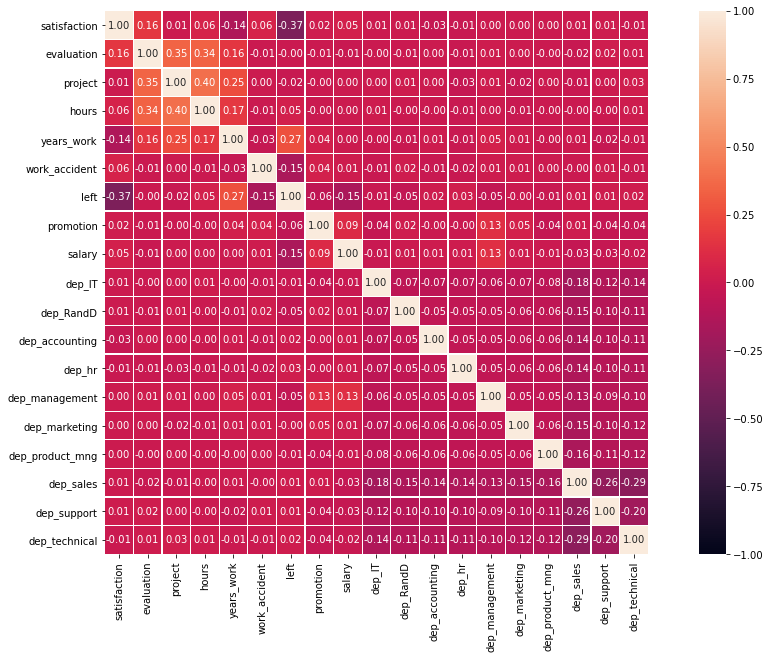

In [22]:
#计算相关系数
correlation = df_one_hot.corr(method = "spearman")
plt.figure(figsize=(18, 10))
#绘制热力图
sns.heatmap(correlation, linewidths=0.2, vmax=1, vmin=-1, linecolor='w',fmt='.2f',
            annot=True,annot_kws={'size':10},square=True)

In [ ]:
# 7. 逻辑回归模型

In [23]:
# 1. 划分数据集
from sklearn.model_selection import train_test_split
#划分训练集和测试集
X = df_one_hot.drop(['left'], axis=1)
y = df_one_hot['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
# # 2. 训练模型
# from sklearn.linear_model import LogisticRegression
# LR = LogisticRegression()
# print(LR.fit(X_train, y_train))
# print("训练集准确率: ", LR.score(X_train, y_train))
# print("测试集准确率: ", LR.score(X_test, y_test))

In [28]:
#指定随机梯度下降优化算法
# LR = LogisticRegression(solver='saga')
# print(LR.fit(X_train, y_train))
# print("训练集准确率: ", LR.score(X_train, y_train))
# print("测试集准确率: ", LR.score(X_test, y_test))

In [30]:
#3. 调参
#用准确率进行10折交叉验证选择合适的参数C
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
Cs = 10**np.linspace(-10, 10, 400)
lr_cv = LogisticRegressionCV(Cs=Cs, cv=10, penalty='l2', solver='saga',  max_iter=10000, scoring='accuracy')
lr_cv.fit(X_train, y_train)
lr_cv.C_
LR = LogisticRegression(solver='saga', penalty='l2', C=25.52908068)
print( LR.fit(X_train, y_train))
print("训练集准确率: ", LR.score(X_train, y_train))
print("测试集准确率: ", LR.score(X_test, y_test))

LogisticRegression(C=25.52908068, solver='saga')
训练集准确率:  0.7984832069339112
测试集准确率:  0.798


In [34]:
from sklearn import metrics
X_train_pred = LR.predict(X_train)
X_test_pred = LR.predict(X_test)
print('训练集混淆矩阵:')
print(metrics.confusion_matrix(y_train, X_train_pred))
print('测试集混淆矩阵:')
print(metrics.confusion_matrix(y_test, X_test_pred))

训练集混淆矩阵:
[[8494  647]
 [1771 1087]]
测试集混淆矩阵:
[[2112  175]
 [ 431  282]]


In [35]:
from sklearn.metrics import classification_report
print('训练集:')
print(classification_report(y_train, X_train_pred))
print('测试集:')
print(classification_report(y_test, X_test_pred))

训练集:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      9141
           1       0.63      0.38      0.47      2858

    accuracy                           0.80     11999
   macro avg       0.73      0.65      0.67     11999
weighted avg       0.78      0.80      0.78     11999

测试集:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2287
           1       0.62      0.40      0.48       713

    accuracy                           0.80      3000
   macro avg       0.72      0.66      0.68      3000
weighted avg       0.78      0.80      0.78      3000



In [ ]:
# 8. 朴素贝叶斯模型

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
#构建高斯朴素贝叶斯模型
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("训练集准确率: ", gnb.score(X_train, y_train))
print("测试集准确率: ", gnb.score(X_test, y_test))
X_train_pred =gnb.predict(X_train)
X_test_pred = gnb.predict(X_test)
print('训练集混淆矩阵:')
print(metrics.confusion_matrix(y_train, X_train_pred))
print('测试集混淆矩阵:')
print(metrics.confusion_matrix(y_test, X_test_pred))
print('训练集:')
print(classification_report(y_train, X_train_pred))
print('测试集:')
print(classification_report(y_test, X_test_pred))

训练集准确率:  0.7440620051670973
测试集准确率:  0.741
训练集混淆矩阵:
[[6791 2350]
 [ 721 2137]]
测试集混淆矩阵:
[[1680  607]
 [ 170  543]]
训练集:
              precision    recall  f1-score   support

           0       0.90      0.74      0.82      9141
           1       0.48      0.75      0.58      2858

    accuracy                           0.74     11999
   macro avg       0.69      0.75      0.70     11999
weighted avg       0.80      0.74      0.76     11999

测试集:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2287
           1       0.47      0.76      0.58       713

    accuracy                           0.74      3000
   macro avg       0.69      0.75      0.70      3000
weighted avg       0.80      0.74      0.76      3000



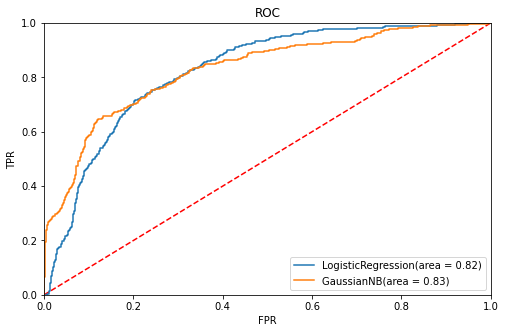

In [37]:
# 9. 模型评估之ROC曲线
from sklearn import metrics
from sklearn.metrics import roc_curve
#将逻辑回归模型和高斯朴素贝叶斯模型预测出的概率均与实际值通过roc_curve比较返回假正率, 真正率, 阈值
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
#分别计算这两个模型的auc的值, auc值就是roc曲线下的面积
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)
gnb_roc_auc = metrics.auc(gnb_fpr, gnb_tpr)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1],'--', color='r')
plt.plot(lr_fpr, lr_tpr, label='LogisticRegression(area = %0.2f)' % lr_roc_auc)
plt.plot(gnb_fpr, gnb_tpr, label='GaussianNB(area = %0.2f)' % gnb_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [ ]:
# ROC曲线越靠近左上角说明分类效果越好, 与之对应的auc的值就越大. 对于该数据集来说, 高斯朴素贝叶斯模型略优于逻辑回归模型